# Penguin Prediction

This notebook builds a predictive model to determine penguin species.

## Import

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px

## Data sourcing

In [2]:
penguins = pd.read_csv("./data/penguins_size.csv")

In [3]:
penguins.sample(2)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
267,Gentoo,Biscoe,50.5,15.9,225.0,5400.0,MALE
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE


## Data processing

In [4]:
penguins = penguins.drop(columns=["island"])

In [5]:
penguins = penguins.dropna()

In [6]:
penguins.shape

(334, 6)

In [7]:
penguins["sex"] = penguins["sex"].replace({ "MALE": 0, "FEMALE":1 })

In [8]:
penguins = penguins.rename(columns={
    "sex": "is_female"
})

In [9]:
penguins.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,is_female
0,Adelie,39.1,18.7,181.0,3750.0,0
1,Adelie,39.5,17.4,186.0,3800.0,1
2,Adelie,40.3,18.0,195.0,3250.0,1
4,Adelie,36.7,19.3,193.0,3450.0,1
5,Adelie,39.3,20.6,190.0,3650.0,0


## Visualise data

In [16]:
penguins = penguins[penguins["is_female"] != "."]

<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

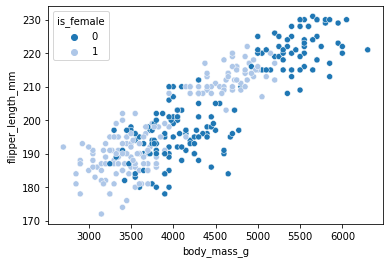

In [27]:
sns.scatterplot(data=penguins,
               x="body_mass_g",
               y="flipper_length_mm",
               hue="is_female",
               palette="tab20")

<AxesSubplot:xlabel='species', ylabel='count'>

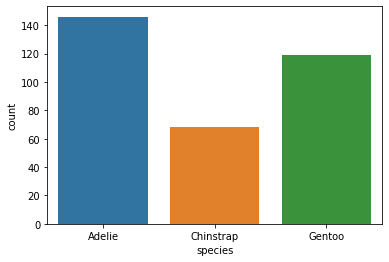

In [42]:
sns.countplot(data=penguins, x="species")

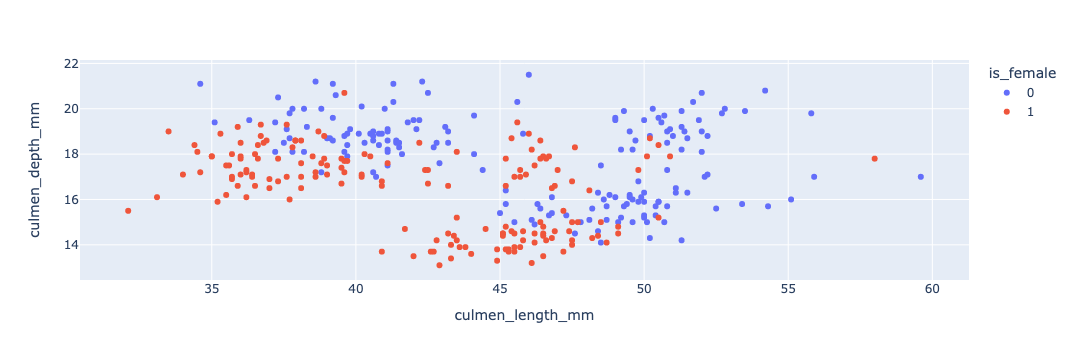

In [48]:
px.scatter(
    data_frame=penguins,
    x="culmen_length_mm",
    y="culmen_depth_mm",
    color="is_female",
    hover_data={
        "species": True
    }
)

## Preprocessing

In [ ]:
# Separate the predictors and target
# Convention: call the thing we want to predict 'y'

y = penguins["species"]